In [60]:
from __future__ import absolute_import, division, print_function
# nav to site packages
import sys
sys.path.append('/Users/polaris/opt/anaconda3/lib/python3.9/site-packages') 
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from emccd_detect.emccd_detect import EMCCDDetect, emccd_detect
from PIL import Image
from astropy.io import fits
from scipy.ndimage.interpolation import zoom
from numpy import unravel_index

/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_6308/2072012089.py:17: RuntimeWarning: invalid value encountered in true_divide
  q=(fluxmap1[0].data.astype(np.float64)-fluxmap2[0].data.astype(np.float64))/(fluxmap1[0].data.astype(np.float64)+fluxmap2[0].data.astype(np.float64))
/var/folders/tz/b2jsht6d7nv7db1v7bt3645c0000gn/T/ipykernel_6308/2072012089.py:18: RuntimeWarning: invalid value encountered in true_divide
  u=(fluxmap3[0].data.astype(np.float64)-fluxmap4[0].data.astype(np.float64))/(fluxmap3[0].data.astype(np.float64)+fluxmap4[0].data.astype(np.float64))


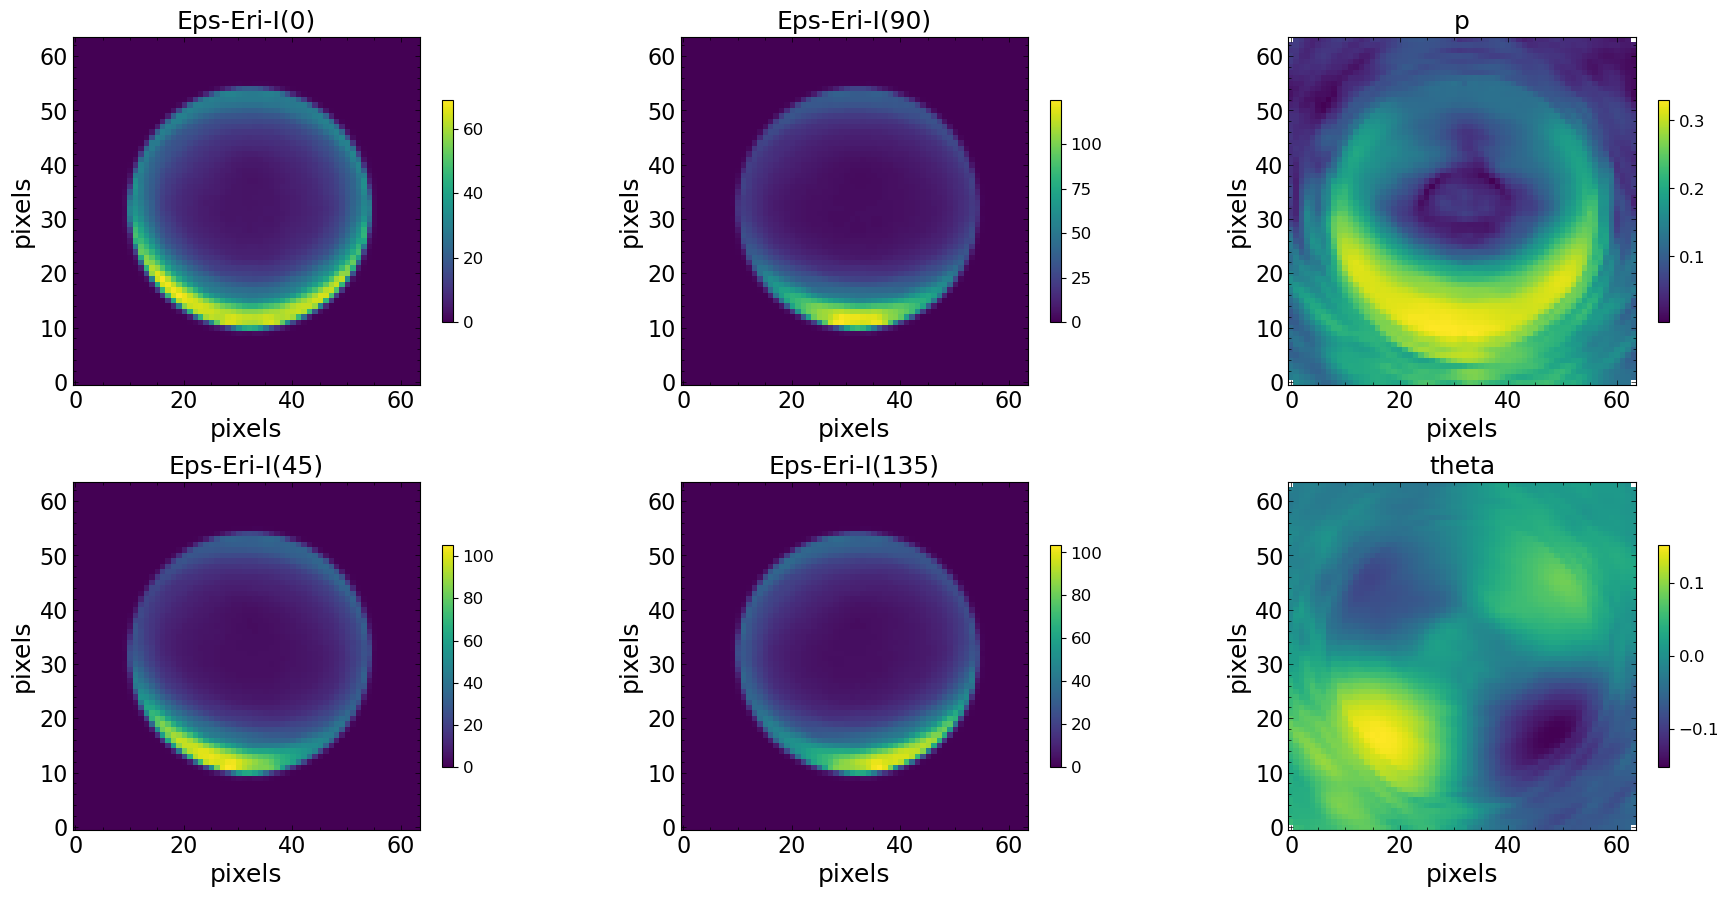

In [61]:
# Import Disk File, gain, and exposure time
file_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/Revision_2/HLC_band/'
disk_file_dir=file_dir+'Astrosil/'
fig_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/Revision_2/Figures/'
diskfile1 = disk_file_dir+'disk_0.fits'
diskfile2 = disk_file_dir+'disk_90.fits'
diskfile3 = disk_file_dir+'disk_45.fits'
diskfile4 = disk_file_dir+'disk_135.fits'
framegain = 5000
frametime = 5  #seconds

fluxmap1 = fits.open(diskfile1)
fluxmap2 = fits.open(diskfile2)
fluxmap3 = fits.open(diskfile3)
fluxmap4 = fits.open(diskfile4)

q=(fluxmap1[0].data.astype(np.float64)-fluxmap2[0].data.astype(np.float64))/(fluxmap1[0].data.astype(np.float64)+fluxmap2[0].data.astype(np.float64))
u=(fluxmap3[0].data.astype(np.float64)-fluxmap4[0].data.astype(np.float64))/(fluxmap3[0].data.astype(np.float64)+fluxmap4[0].data.astype(np.float64))
p=np.sqrt(q*q+u*u)
theta=0.5*np.arctan(u,q)

fig = plt.figure(figsize=(20, 10))
ax1=fig.add_subplot(231)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(fluxmap1[0].data,cmap='viridis')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('Eps-Eri-I(0)',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.ax.tick_params(labelsize=12)

ax1=fig.add_subplot(232)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(fluxmap2[0].data,cmap='viridis')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('Eps-Eri-I(90)',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.ax.tick_params(labelsize=12)

ax1=fig.add_subplot(233)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(p,cmap='viridis')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('p',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.ax.tick_params(labelsize=12)

ax1=fig.add_subplot(234)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(fluxmap3[0].data,cmap='viridis')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('Eps-Eri-I(45)',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.ax.tick_params(labelsize=12)

ax1=fig.add_subplot(235)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(fluxmap4[0].data,cmap='viridis')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('Eps-Eri-I(135)',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.ax.tick_params(labelsize=12)

ax1=fig.add_subplot(236)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(theta,cmap='viridis')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('theta',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(hspace=0, wspace=0.4, top=1, right=0.95)

In [62]:
np.nanmax(p)

0.3305231560027074

In [63]:
# meta_path will depend on the directory you installed emccd_detect in
meta_path = ''
here = os.path.abspath(os.path.dirname('Photon-Counting'))
print(here)

/Users/polaris/Library/CloudStorage/OneDrive-UniversityofArizona/Debris-Disk-Modelling/Debris_Jupyter_nb/Final-notebooks-Revision


In [64]:
# Begin file loading
fluxmap1 = fits.getdata(diskfile1).astype(float)
fluxmap2 = fits.getdata(diskfile2).astype(float)
fluxmap3 = fits.getdata(diskfile3).astype(float)
fluxmap4 = fits.getdata(diskfile4).astype(float)

In [65]:
# Run Nemati's EMCCDDetect detector model, parameters from the ipac website
emccd = EMCCDDetect(
            em_gain=100, # gain (e-/photoelectron)
            full_well_image=60000, # Image area full well capacity e-
            dark_current=8.33e-4, # e-/pix/s, taken from 0.76 e-/pix/hr
            cic=0.02, # e-/pix/frame
            read_noise=100, # e-/pix/frame
            bias=200, # e-
            qe=1.0, 
            cr_rate=0., # cosmic ray rate hits/cm^2/s
            pixel_pitch=13e-6, # distance between centers m
            numel_gain_register=604, 
            nbits=14)
#emccd = EMCCDDetect()
# Simulate EMCCD frames from the given input fluxmap - this tends to run for quite some time
for ijk in range(50):
    sim_frame1 = emccd.sim_sub_frame(fluxmap1, frametime)
    sim_frame2 = emccd.sim_sub_frame(fluxmap2, frametime)
    sim_frame3 = emccd.sim_sub_frame(fluxmap3, frametime)
    sim_frame4 = emccd.sim_sub_frame(fluxmap4, frametime)
    #sim_frame1=fluxmap1
    #sim_frame2=fluxmap2
    if ijk == 0:
        diskar1 = sim_frame1+np.sqrt(sim_frame1)
        diskar2 = sim_frame2+np.sqrt(sim_frame2)
        diskar3 = sim_frame3+np.sqrt(sim_frame3)
        diskar4 = sim_frame4+np.sqrt(sim_frame4)
        print('first disk!')
    else:
        diskar1 = np.dstack([diskar1,sim_frame1+np.sqrt(sim_frame1)])
        diskar2 = np.dstack([diskar2,sim_frame2+np.sqrt(sim_frame1)])
        diskar3 = np.dstack([diskar3,sim_frame3+np.sqrt(sim_frame1)])
        diskar4 = np.dstack([diskar4,sim_frame4+np.sqrt(sim_frame1)])
        print('disk ',ijk,' counted')

first disk!
disk  1  counted
disk  2  counted
disk  3  counted
disk  4  counted
disk  5  counted
disk  6  counted
disk  7  counted
disk  8  counted
disk  9  counted
disk  10  counted
disk  11  counted
disk  12  counted
disk  13  counted
disk  14  counted
disk  15  counted
disk  16  counted
disk  17  counted
disk  18  counted
disk  19  counted
disk  20  counted
disk  21  counted
disk  22  counted
disk  23  counted
disk  24  counted
disk  25  counted
disk  26  counted
disk  27  counted
disk  28  counted
disk  29  counted
disk  30  counted
disk  31  counted
disk  32  counted
disk  33  counted
disk  34  counted
disk  35  counted
disk  36  counted
disk  37  counted
disk  38  counted
disk  39  counted
disk  40  counted
disk  41  counted
disk  42  counted
disk  43  counted
disk  44  counted
disk  45  counted
disk  46  counted
disk  47  counted
disk  48  counted
disk  49  counted


In [74]:
px=64
xpix=(np.arange (0, 64, 1))
ypix=(np.arange (0, 64, 1))

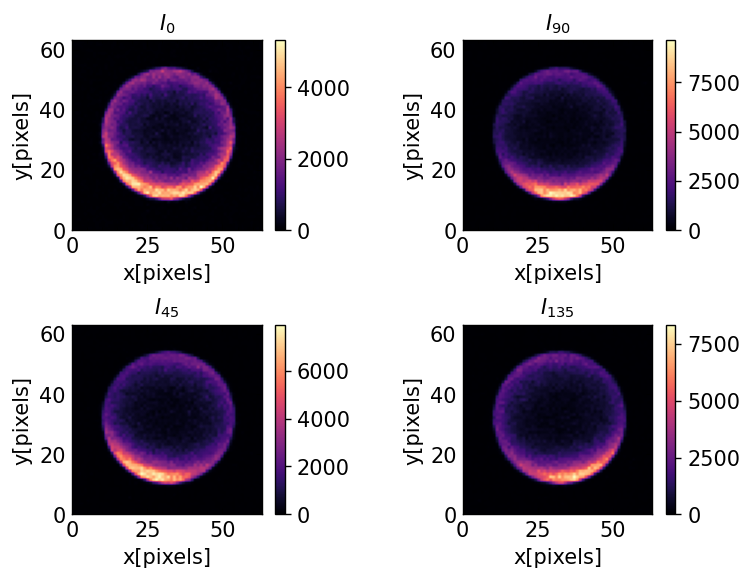

In [75]:
fig = plt.figure(dpi=125)
ax1=fig.add_subplot(221)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im1=ax1.imshow(diskar1[:,:,1],cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax1.invert_yaxis()
ax1.set_ylabel('y[pixels]',fontsize=12)
ax1.set_xlabel('x[pixels]',fontsize=12)
ax1.set_title('$I_{0}$',fontsize=12)
cb = fig.colorbar(im1,orientation='vertical')
cb.ax.tick_params(labelsize=12)

ax1=fig.add_subplot(222)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im1=ax1.imshow(diskar2[:,:,1],cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax1.invert_yaxis()
ax1.set_ylabel('y[pixels]',fontsize=12)
ax1.set_xlabel('x[pixels]',fontsize=12)
ax1.set_title('$I_{90}$',fontsize=12)
cb = fig.colorbar(im1,orientation='vertical')
cb.ax.tick_params(labelsize=12)

ax1=fig.add_subplot(223)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im1=ax1.imshow(diskar3[:,:,1],cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax1.invert_yaxis()
ax1.set_ylabel('y[pixels]',fontsize=12)
ax1.set_xlabel('x[pixels]',fontsize=12)
ax1.set_title('$I_{45}$',fontsize=12)
cb = fig.colorbar(im1,orientation='vertical')
cb.ax.tick_params(labelsize=12)

ax1=fig.add_subplot(224)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im1=ax1.imshow(diskar4[:,:,1],cmap='magma',extent=[np.min(xpix),np.max(xpix),np.max(ypix),np.min(ypix)])
ax1.invert_yaxis()
ax1.set_ylabel('y[pixels]',fontsize=12)
ax1.set_xlabel('x[pixels]',fontsize=12)
ax1.set_title('$I_{135}$',fontsize=12)
cb = fig.colorbar(im1,orientation='vertical')
cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(hspace=0.5, wspace=0.45, top=0.9, right=0.95)
fig.savefig(fig_dir+'emccd_intensities_epseri.pdf', format='pdf', bbox_inches='tight')

In [76]:
disk_new1=zoom(diskar1,[48/64,48/64,1])
disk_new2=zoom(diskar2,[48/64,48/64,1])
disk_new3=zoom(diskar3,[48/64,48/64,1])
disk_new4=zoom(diskar4,[48/64,48/64,1])
# write stack to fits file
hdu = fits.PrimaryHDU(data=disk_new1)
hdul = fits.HDUList([hdu])
hdul.writeto(disk_file_dir+'raw_emccd_I0.fits',overwrite=True)
hdu = fits.PrimaryHDU(data=disk_new2)
hdul = fits.HDUList([hdu])
hdul.writeto(disk_file_dir+'raw_emccd_I90.fits',overwrite=True)
hdu = fits.PrimaryHDU(data=disk_new3)
hdul = fits.HDUList([hdu])
hdul.writeto(disk_file_dir+'raw_emccd_I45.fits',overwrite=True)
hdu = fits.PrimaryHDU(data=disk_new4)
hdul = fits.HDUList([hdu])
hdul.writeto(disk_file_dir+'raw_emccd_I135.fits',overwrite=True)

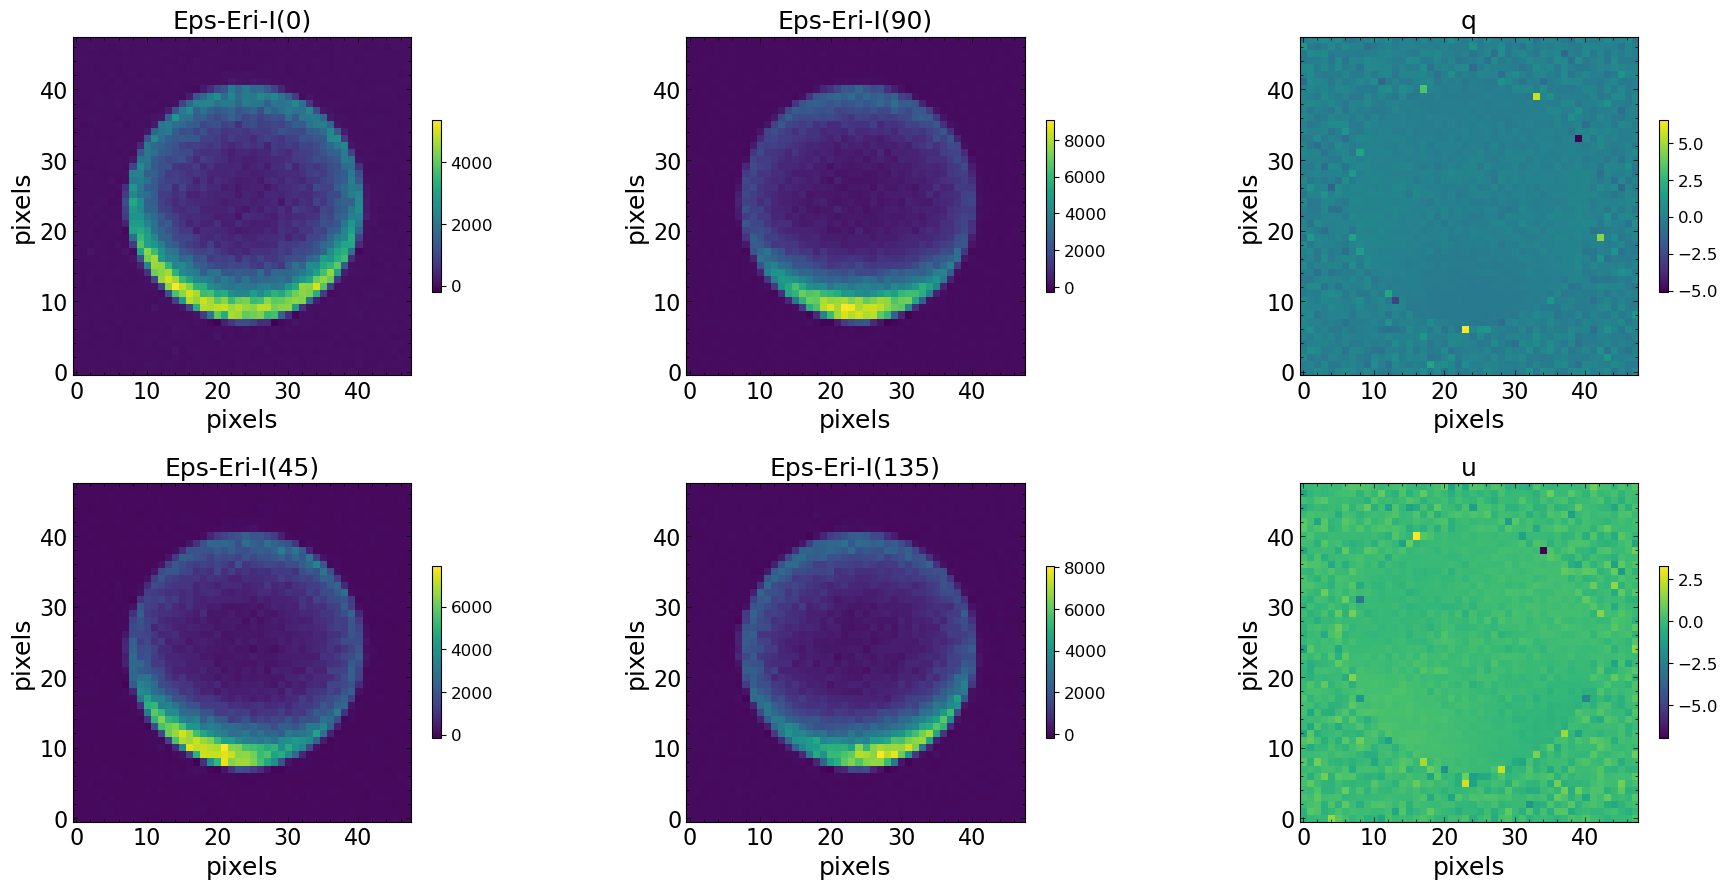

In [69]:
q=(disk_new1[:,:,0].astype(np.float64)-disk_new2[:,:,0].astype(np.float64))/(disk_new1[:,:,0].astype(np.float64)+disk_new2[:,:,0].astype(np.float64))
u=(disk_new3[:,:,0].astype(np.float64)-disk_new4[:,:,0].astype(np.float64))/(disk_new3[:,:,0].astype(np.float64)+disk_new4[:,:,0].astype(np.float64))


fig = plt.figure(figsize=(20, 10))

ax1=fig.add_subplot(231)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(disk_new1[:,:,10],cmap='viridis')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('Eps-Eri-I(0)',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.ax.tick_params(labelsize=12)

ax1=fig.add_subplot(232)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(disk_new2[:,:,10],cmap='viridis')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('Eps-Eri-I(90)',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.ax.tick_params(labelsize=12)

ax1=fig.add_subplot(233)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(q,cmap='viridis')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('q',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.ax.tick_params(labelsize=12)

ax1=fig.add_subplot(234)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(disk_new3[:,:,10],cmap='viridis')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('Eps-Eri-I(45)',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.ax.tick_params(labelsize=12)

ax1=fig.add_subplot(235)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(disk_new4[:,:,10],cmap='viridis')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('Eps-Eri-I(135)',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.ax.tick_params(labelsize=12)

ax1=fig.add_subplot(236)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(u,cmap='viridis')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('u',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(hspace=0.3, wspace=0.45, top=0.9, right=0.95)

In [70]:
pmax_list=[]
for i in range(50):

    q=(disk_new1[:,:,i].astype(np.float64)-disk_new2[:,:,i].astype(np.float64))/(disk_new1[:,:,i].astype(np.float64)+disk_new2[:,:,i].astype(np.float64))
    u=(disk_new3[:,:,i].astype(np.float64)-disk_new4[:,:,i].astype(np.float64))/(disk_new3[:,:,i].astype(np.float64)+disk_new4[:,:,i].astype(np.float64))
    p=np.sqrt(q*q+u*u)
    pmax=np.max(p)
    pmax_list.append(pmax)

Text(0.5, 1.0, 'pmax')

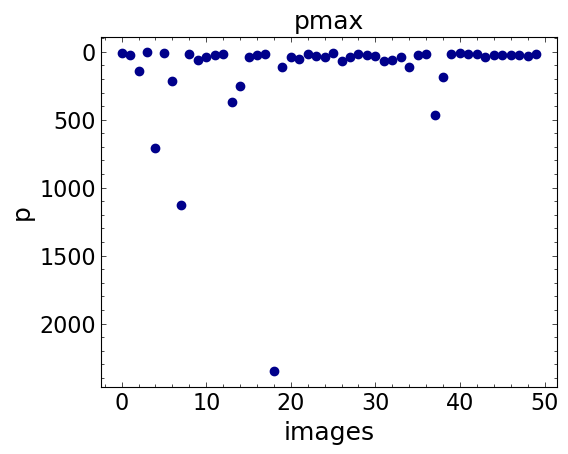

In [71]:
fig = plt.figure(figsize=(20, 10))

ax1=fig.add_subplot(231)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
ax1.plot(pmax_list,'o',color='darkblue')
ax1.invert_yaxis()
ax1.set_ylabel('p',fontsize=18)
ax1.set_xlabel('images',fontsize=18)
ax1.set_title('pmax',fontsize=18)

In [72]:
np.mean(pmax_list)

142.8913932903565

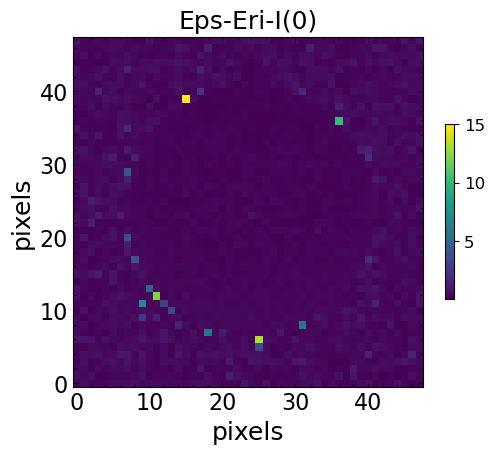

In [73]:
p=np.sqrt(q*q+u*u)

fig = plt.figure(figsize=(20, 10))

ax1=fig.add_subplot(231)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=16)
im1=ax1.imshow(p,cmap='viridis')
ax1.invert_yaxis()
ax1.set_ylabel('pixels',fontsize=18)
ax1.set_xlabel('pixels',fontsize=18)
ax1.set_title('Eps-Eri-I(0)',fontsize=18)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.5)
cb.ax.tick_params(labelsize=12)